# COVID-19 の国際的なデータセットの探索的データ分析

[DELVE Covid 19 international dataset](https://github.com/rs-delve/covid19_datasets) をもとに EDA を実施。

この Notebook は[上記データセットにある Notebook](https://github.com/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb) をもとに作成している。

まずはデータの読み込み。

In [2]:
!pip install seaborn

     |████████████████████████████████| 286kB 10.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

In [42]:
# データの読み込み
path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])
df

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51240,ZWE,2020-09-29,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7816.0,4.0,228.0,1.0,525.872,0.269,15.34,0.067,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,1899.775,192.0,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,15.8,1521311.0,2788693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51241,ZWE,2020-09-30,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7837.0,21.0,228.0,0.0,527.285,1.413,15.34,0.000,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,1899.775,193.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,15.8,1521311.0,2788693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51242,ZWE,2020-10-01,

各カラムの情報を表示

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51245 entries, 0 to 51244
Data columns (total 67 columns):
ISO                                   51245 non-null object
DATE                                  51245 non-null datetime64[ns]
country_name                          51245 non-null object
npi_school_closing                    49982 non-null float64
npi_workplace_closing                 49968 non-null float64
npi_cancel_public_events              50012 non-null float64
npi_gatherings_restrictions           50016 non-null float64
npi_close_public_transport            50008 non-null float64
npi_stay_at_home                      49989 non-null float64
npi_internal_movement_restrictions    49952 non-null float64
npi_international_travel_controls     49995 non-null float64
npi_income_support                    49626 non-null float64
npi_debt_relief                       48701 non-null float64
npi_fiscal_measures                   47971 non-null float64
npi_international_support       

国のリストを表示

In [44]:
pd.set_option('display.max_rows', 200)
display(df.drop_duplicates(subset=['ISO', 'country_name'], keep='first')[['ISO', 'country_name']].reset_index(drop=True))
pd.set_option('display.max_rows', 100)

,ISO,country_name
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALB,Albania
5,AND,Andorra
6,ARE,United Arab Emirates
7,ARG,Argentina
8,AUS,Australia
9,AUT,Austria


## 非医療介入(NPIs: Non-Pharmaceutical Interventions)の可視化あ

オックスフォード・ガバメント・レスポンス・トラッカーは、各国ごとに13のNPIを序列スケールで提供しており、介入の実施の強さの両方を反映している。

このデータを用いて可視化を進める。

### NPI の時系列変化

COVID-19の症例数が最も多かった10カ国に対して、最初に報告された症例からの日数と各NPIが導入された時期を可視化する。

これにより、各国でさまざまな NPI がどの程度普及していたか、あるいは同時多発的に普及したのかなどを確認する。

例えば、米国のNPIは発生からかなり広がっているが、スペインのNPIは発生から50日後経って広がっている。。

In [45]:
# 描画のためのデータ加工
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

countries = df.groupby('country_name').cases_total.max().nlargest(10).index
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
plot_df

,country_name,NPI,cases_days_since_first,value
0,Argentina,npi_cancel_public_events,7.0,2
1,Argentina,npi_close_public_transport,19.0,4
2,Argentina,npi_contact_tracing,0.0,12
3,Argentina,npi_debt_relief,21.0,9
4,Argentina,npi_gatherings_restrictions,15.0,3
...,...,...,...,...
132,United States,npi_public_information,55.0,10
133,United States,npi_school_closing,44.0,0
134,United States,npi_stay_at_home,54.0,5
135,United States,npi_testing_policy,38.0,11


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


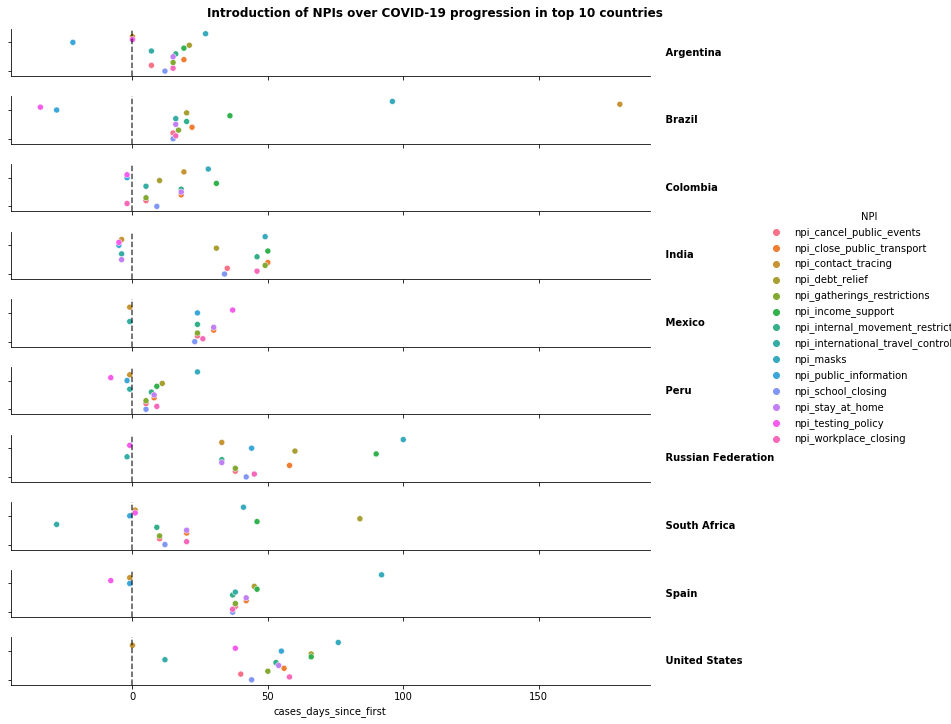

In [46]:
# グラフの描画
g = sns.relplot(data=plot_df, 
                x='cases_days_since_first', 
                y='value', 
                hue='NPI', 
                row='country_name', 
                kind='scatter', 
                height=1, 
                aspect=10, 
                marker='o', 
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

for ax in g.axes.flat:
  txt = ax.texts[0]
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
          txt.get_text().split('=')[1],
          transform=ax.transAxes,
          va='center',
          fontweight='bold')
  ax.texts[0].remove()
  ax.set_ylabel(None)
  ax.set_yticklabels([])
  ax.axvline(0, ls='--', c='k', alpha=0.7)

g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

leg = g._legend
leg.set_bbox_to_anchor([1.05, 0.55]) 

plt.subplots_adjust(top=0.95)
plt.show()

### NPI を実施している国のカウント

「広報キャンペーン」、「国際旅行規制」、「学校閉鎖」などのようないくつかの NPI が、ほぼすべての国で実施されていることを確認する。

一方で、マスクの普及などの他のNPIの導入は、あまり一般的ではないことも確認できる。

※注： より最近の日付でのプロットの落ち込みは、最近のデータの不完全性のから由来している。これは報告と捕捉の遅れの両方に起因するものであり、各国のNPIの低下を必ずしも反映しているわけではない。データ提供者（オックスフォード）は、最新の1～2週間分のデータを慎重に使用することを提案してる。

In [47]:
# Plot
plot_df = (df.set_index(['DATE', 'ISO'])[npis] > 0).groupby(level=0).sum()
plot_df = plot_df.iloc[:-1].reset_index().melt(id_vars=['DATE'], var_name='NPI', value_name='Count')
plot_df = plot_df.query('DATE > "2020-03-01"')
plot_df

,DATE,NPI,Count
61,2020-03-02,npi_school_closing,19.0
62,2020-03-03,npi_school_closing,20.0
63,2020-03-04,npi_school_closing,21.0
64,2020-03-05,npi_school_closing,25.0
65,2020-03-06,npi_school_closing,27.0
...,...,...,...
3859,2020-09-28,npi_masks,129.0
3860,2020-09-29,npi_masks,129.0
3861,2020-09-30,npi_masks,129.0
3862,2020-10-01,npi_masks,129.0


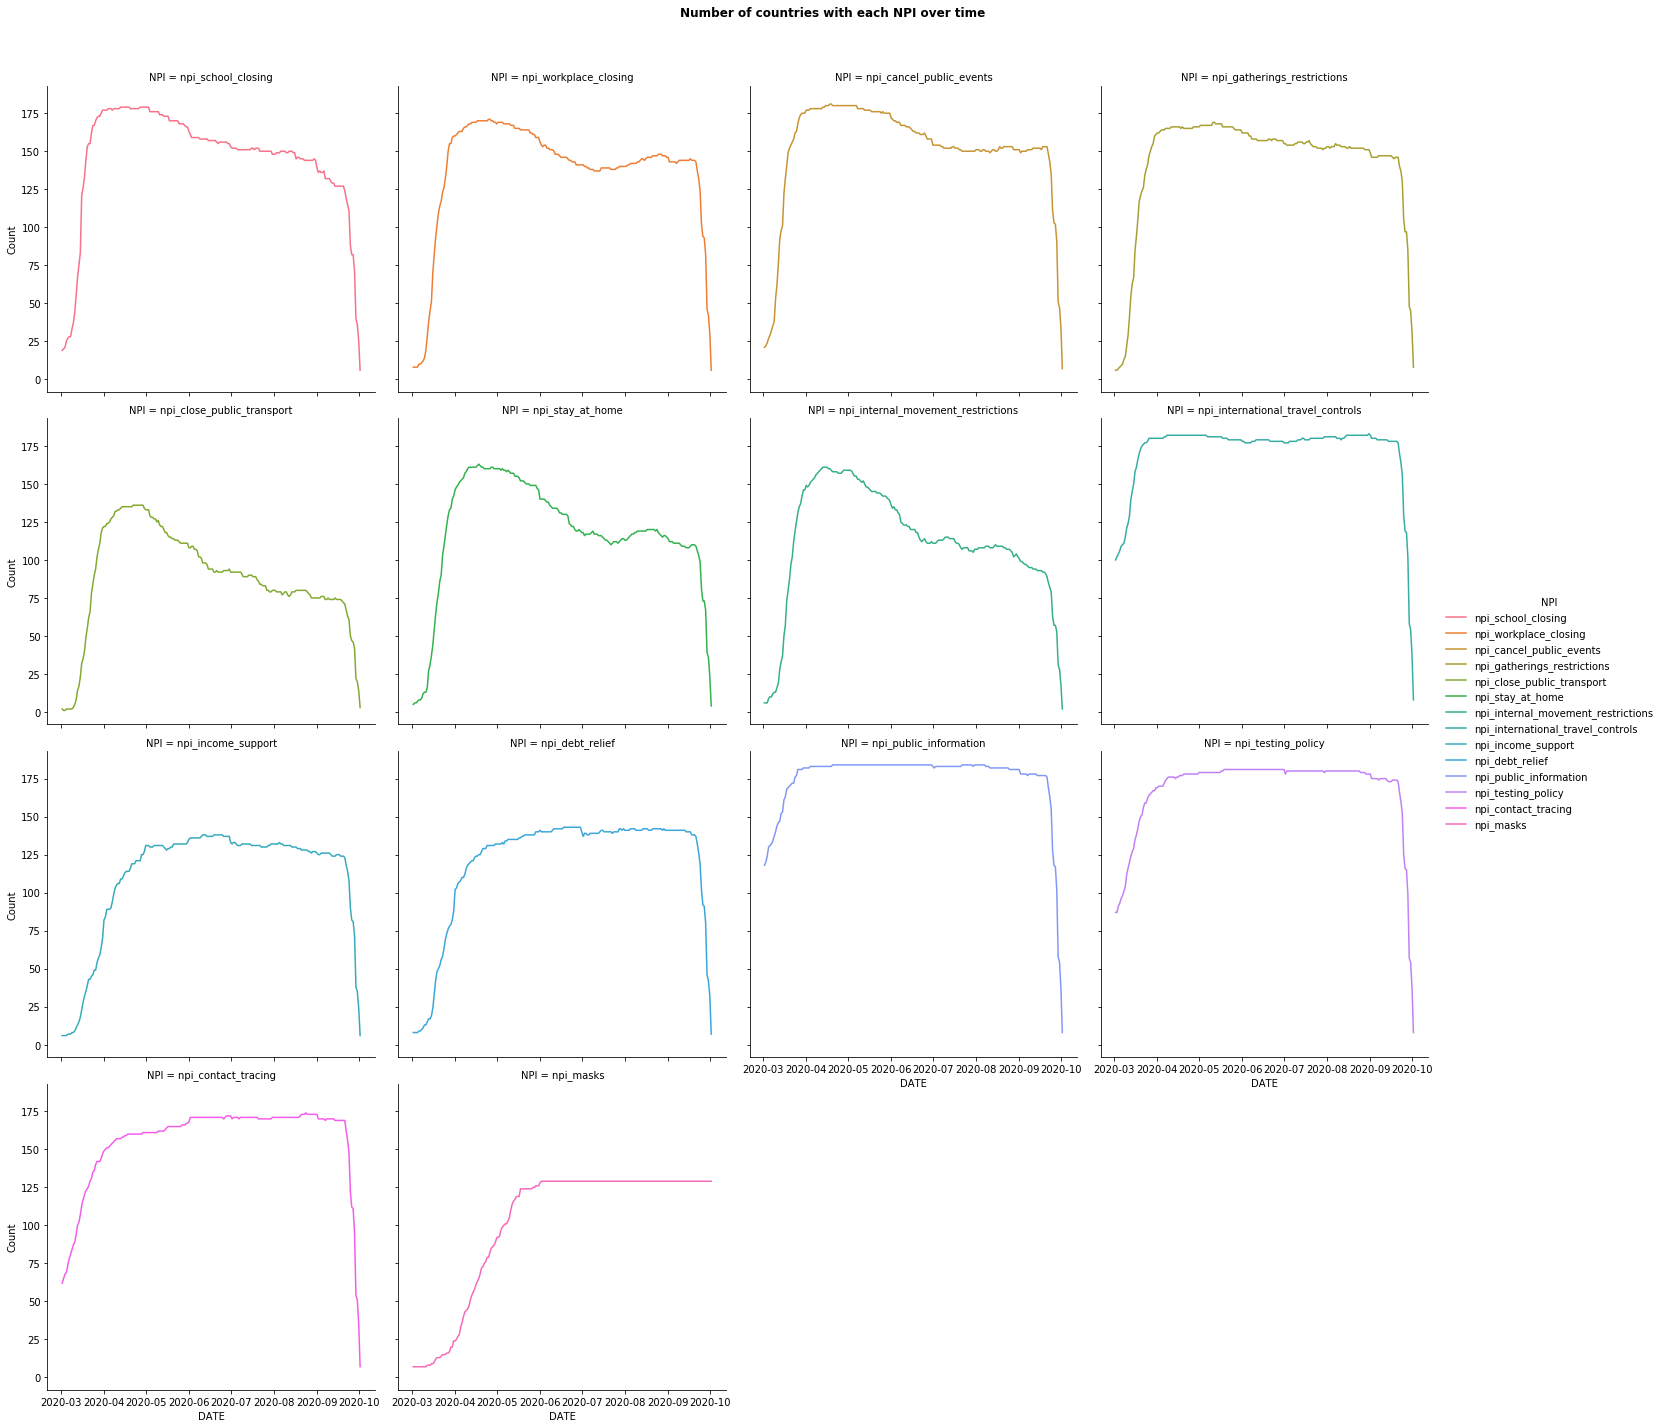

In [48]:
# グラフ
g = sns.relplot(data=plot_df, x='DATE', y='Count', col='NPI', col_wrap=4, hue='NPI', kind='line')
plt.subplots_adjust(top=0.925)
g.fig.suptitle('Number of countries with each NPI over time', fontweight='bold')
plt.show()

直近2週間のデータを除外してみる。

In [49]:
#@title Excluding the last 2 weeks
plot_df = (df.set_index(['DATE', 'ISO'])[npis] > 0).groupby(level=0).sum()
plot_df = plot_df.iloc[:-1].reset_index().melt(id_vars=['DATE'], var_name='NPI', value_name='Count')
two_weeks_ago = (date.today() - timedelta(14)).strftime('%Y-%m-%d')
plot_df = plot_df.query('DATE > "2020-03-01" and DATE < "{}"'.format(two_weeks_ago))
plot_df

,DATE,NPI,Count
61,2020-03-02,npi_school_closing,19.0
62,2020-03-03,npi_school_closing,20.0
63,2020-03-04,npi_school_closing,21.0
64,2020-03-05,npi_school_closing,25.0
65,2020-03-06,npi_school_closing,27.0
...,...,...,...
3845,2020-09-14,npi_masks,129.0
3846,2020-09-15,npi_masks,129.0
3847,2020-09-16,npi_masks,129.0
3848,2020-09-17,npi_masks,129.0


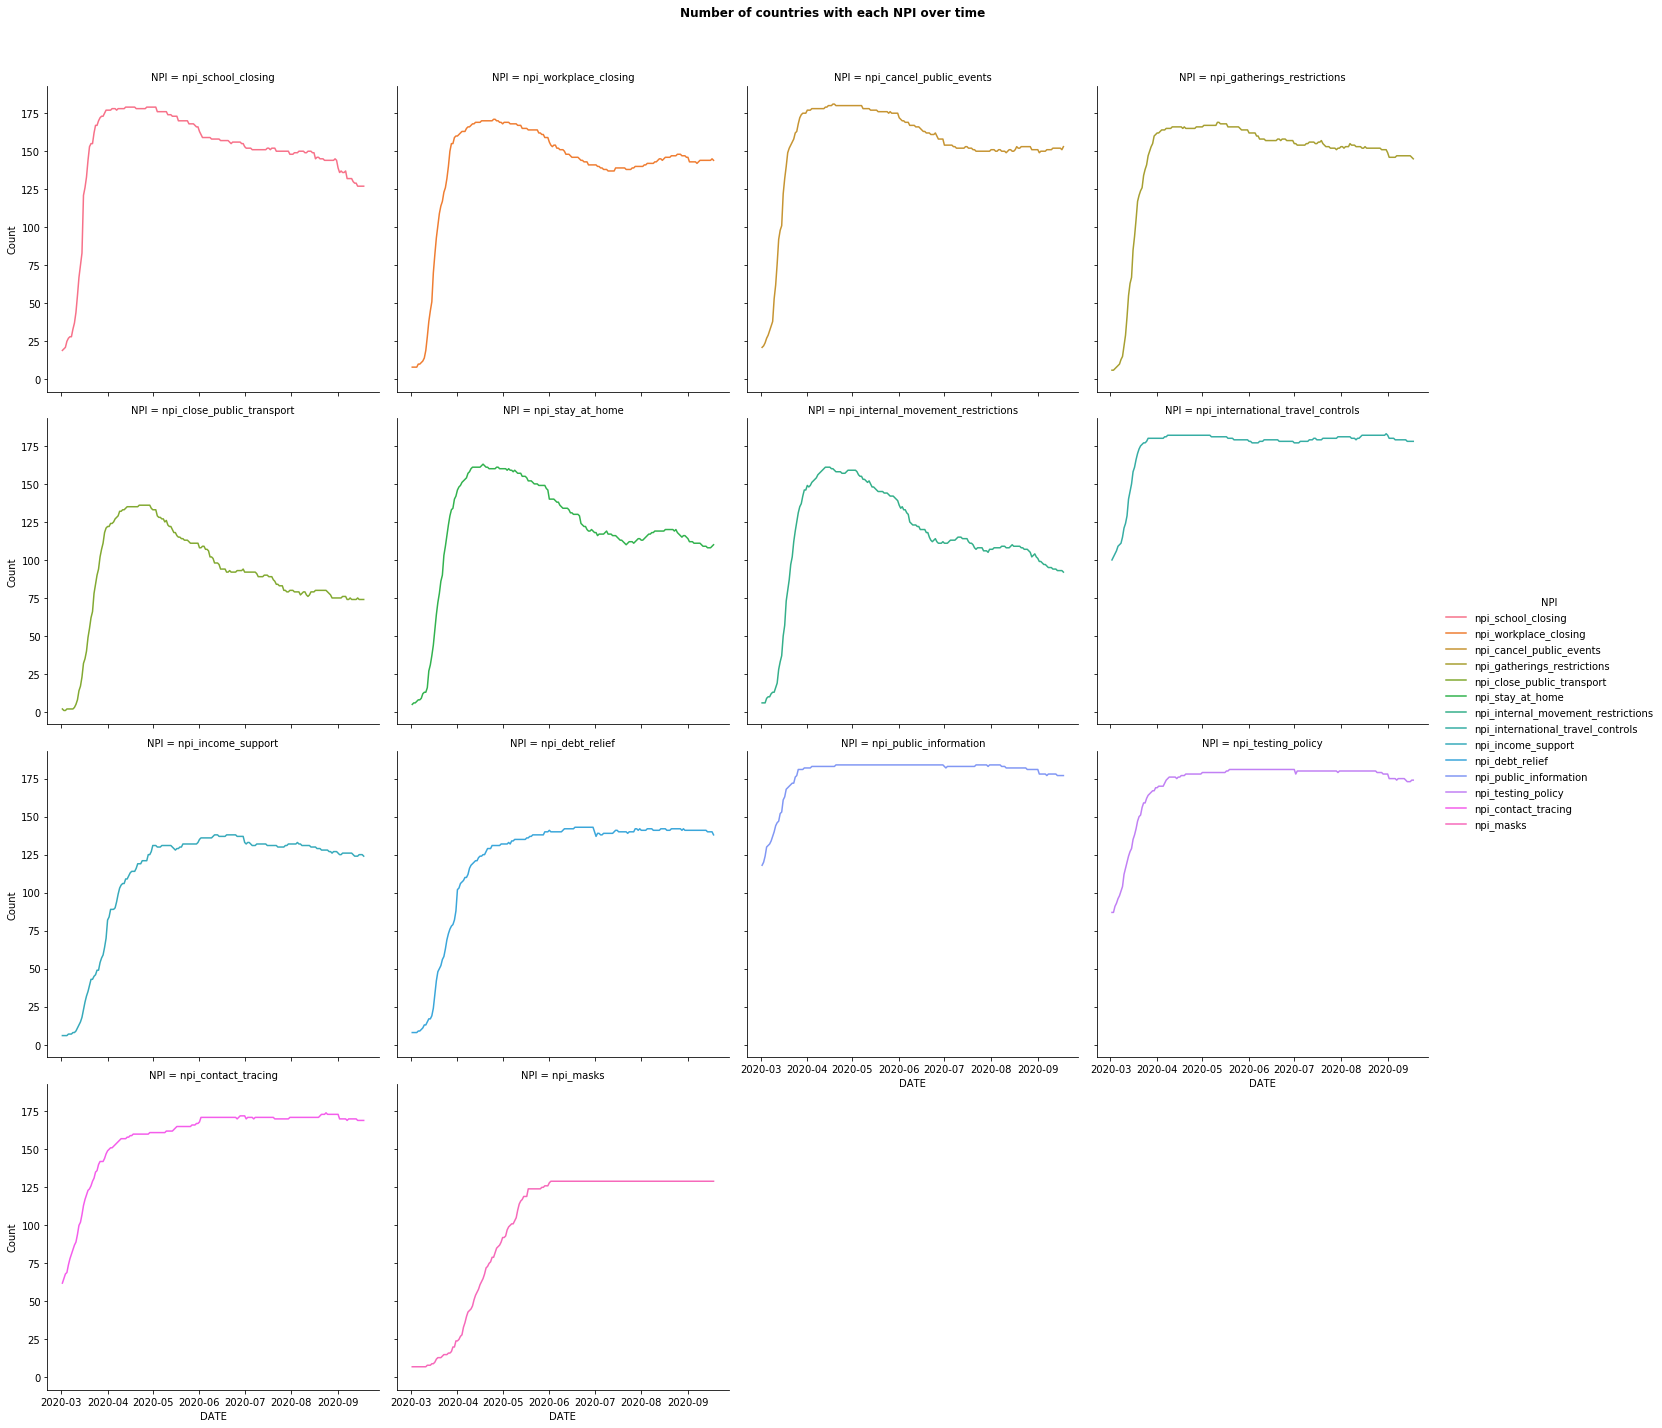

In [50]:
# グラフ化
g = sns.relplot(data=plot_df, x='DATE', y='Count', col='NPI', col_wrap=4, hue='NPI', kind='line')
plt.subplots_adjust(top=0.925)
g.fig.suptitle('Number of countries with each NPI over time', fontweight='bold')
plt.show()

## 国ごとの1日あたりの新規死亡者数

国ごとの1日あたりの新規死亡者数を見ると、減少傾向にあるように見える。

データに曜日効果があるので注意が必要。例えば、ドイツとイギリスは共に月曜日に新規死亡者数が減少している。

分析を行う前に、これらのデータにスムージングやその他の正規化を適用する必要がある（曜日に左右されない状況を作る必要がある）。

In [51]:
#@title New Deaths Per Day Plot
isos = ['AUT', 'CZE', 'DEU', 'ESP', 'FRA', 'GBR']
start_date = '2020-03-01'
plot_df = df[df.ISO.isin(isos)].query(f'DATE > "{start_date}"').replace(0, np.nan)

sundays = plot_df.DATE[plot_df.DATE.dt.dayofweek == 6]
plot_df

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
2554,AUT,2020-03-02,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,11.11,NaN,14.0,4.0,NaN,NaN,1.554,0.444,NaN,NaN,1649.0,NaN,0.183,NaN,NaN,NaN,9006400.0,106.749,44.4,45436.686,5.0,-11.0,NaN,NaN,NaN,2.0,6.0,16.0,1.0,3.0,-1.0,103.21,NaN,111.80,7.6,29.6,1915338.0,1098306.0,NaN,NaN,0.000069,0.004987,123.225897,7.976473,3.874261,11.838213,4.309849
2555,AUT,2020-03-03,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,11.11,NaN,18.0,4.0,NaN,NaN,1.999,0.444,NaN,NaN,2683.0,NaN,0.298,NaN,352.0,0.039,9006400.0,106.749,44.4,45436.686,6.0,-10.0,NaN,NaN,NaN,-1.0,4.0,-1.0,-3.0,2.0,1.0,104.24,NaN,110.27,7.6,29.6,1915338.0,1098306.0,NaN,NaN,0.000039,0.004844,67.472487,6.004151,3.053014,8.690836,4.888991
2556,AUT,2020-03-04,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11128806.0,NaN,2.0,1.0,1.0,NaN,NaN,11.11,NaN,24.0,6.0,NaN,NaN,2.665,0.666,NaN,NaN,3138.0,455.0,0.348,0.051,402.0,0.045,9006400.0,106.749,44.4,45436.686,7.0,-9.0,NaN,NaN,NaN,2.0,5.0,12.0,NaN,2.0,NaN,111.11,NaN,112.82,7.6,29.6,1915338.0,1098306.0,NaN,NaN,0.000002,0.003698,113.753208,4.317806,1.464758,7.895753,3.591380
2557,AUT,2020-03-05,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,11.11,NaN,29.0,5.0,NaN,NaN,3.220,0.555,NaN,NaN,3711.0,573.0,0.412,0.064,466.0,0.052,9006400.0,106.749,44.4,45436.686,8.0,-8.0,NaN,NaN,NaN,1.0,3.0,4.0,NaN,1.0,NaN,111.25,NaN,120.92,7.6,29.6,1915338.0,1098306.0,NaN,NaN,0.000001,0.003518,140.397149,4.293054,-1.958130,9.593054,4.059752
2558,AUT,2020-03-06,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,11.11,NaN,41.0,12.0,NaN,NaN,4.552,1.332,NaN,NaN,4000.0,289.0,0.444,0.032,462.0,0.051,9006400.0,106.749,44.4,45436.686,9.0,-7.0,NaN,NaN,NaN,-1.0,3.0,-7.0,-2.0,1.0,NaN,123.46,NaN,133.87,7.6,29.6,1915338.0,1098306.0,NaN,NaN,0.000093,0.005038,52.070771,5.683703,3.470302,8.765071,2.646491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,GBR,2020-09-29,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,439013.0,4044.0,42001.0,13.0,6466.915,59.570,618.699,0.191,20503188.0,198402.0,302.024,2.923,229406.0,3.379,67886004.0,272.898,40.8,39753.244,241.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.87,79.16,113.04,2.8,22.3,18018197.0,8474410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17170,GBR,2020-09-30,United Kingdom,NaN,

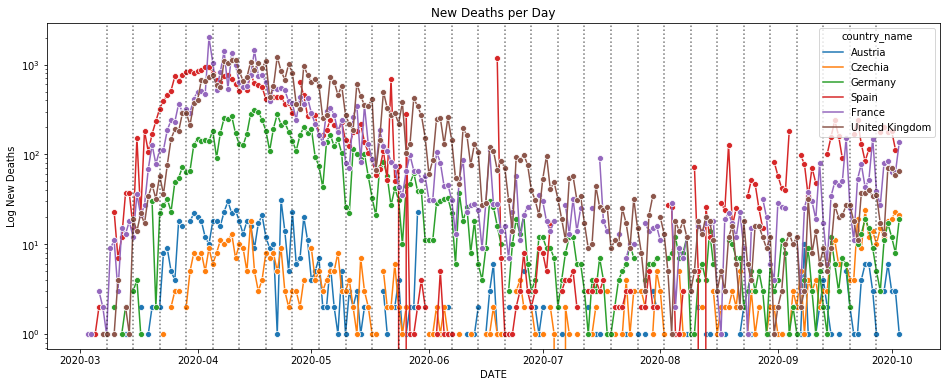

In [52]:
# グラフ化
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=plot_df, x='DATE', y='deaths_new', hue='country_name', marker='o')
plt.yscale('log')
plt.title('New Deaths per Day')
plt.ylabel('Log New Deaths')

for sunday in sundays:
  plt.axvline(sunday, c='k', ls=':', alpha=0.1)

plt.show()

## 平滑化した死亡数

新規死亡者数は曜日に依存するので、平滑化するために、7日を中心としたローリング平均（移動平均）を取る。

平滑化された死亡数をカウントするために関数を定義して適用している。

また、オックスフォード・ガバメント・レスポンス・トラッカー・データセットは、0から100の間の値で、国のアクティブなNPIのレベルを要約したStringency Indexメジャーを提供しているので、平滑化した死亡数と合わせて表示する。

In [53]:
#@title Add smoothed new cases and deaths
df = df.set_index(['ISO', 'DATE'])

def smooth(series):
  return series.rolling(window=7, center=True).mean()

df.loc[:, 'deaths_new_smoothed'] = df.loc[:, 'deaths_new'].groupby(level=0).apply(smooth)
df.loc[:, 'cases_new_smoothed'] = df.loc[:, 'cases_new'].groupby(level=0).apply(smooth)

df = df.reset_index()
df

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean,deaths_new_smoothed,cases_new_smoothed
0,ABW,2020-01-01,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,3.238519e-06,0.016900,220.264984,27.246809,26.732813,27.709375,9.019097,NaN,NaN
1,ABW,2020-01-02,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,6.755193e-07,0.016645,223.333893,27.049299,26.558985,27.508204,8.752604,NaN,NaN
2,ABW,2020-01-03,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.329184e-05,0.017244,220.742767,27.193014,26.695704,27.582422,8.564670,NaN,NaN
3,ABW,2020-01-04,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,1.788139e-07,0.016593,225.407074,27.267725,26.775782,27.771875,8.304688,NaN,NaN
4,ABW,2020-01-05,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17521.0,NaN,NaN,7.867813e-06,0.017142,219.864334,27.255766,26.965235,27.611719,5.604166,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51240,ZWE,2020-09-29,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7816.0,4.0,228.0,1.0,525.872,0.269,15.34,0.067,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,1899.775,192.0,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,15.8,1521311.0,2788693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,14.000000
51241,ZWE,2020-09-30,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7837.0,21.0,228.0,0.0,527.285,1.413,15.34,0.000,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,1899.775,193.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Dropdown(description='Country:', index=174, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), (…

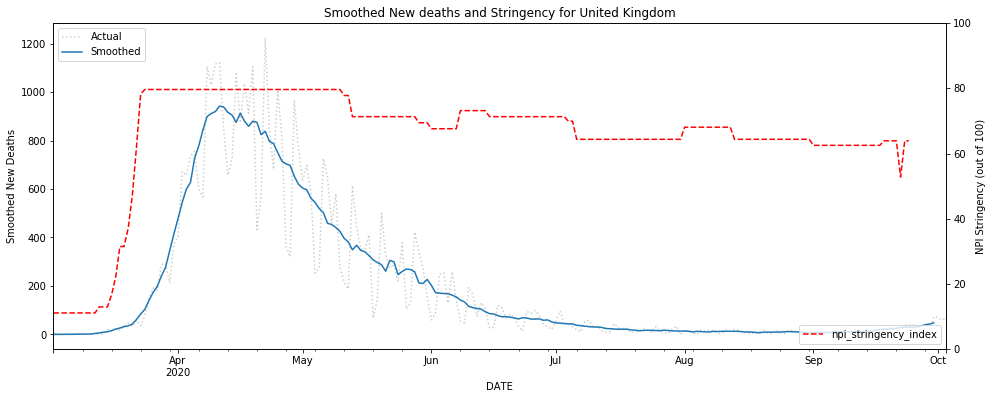

In [54]:
#@title Smoothed Deaths and Stringency plot

def add_widget(country):
  country_widget = widgets.Dropdown(
      options=sorted([(c, c) for c in df.country_name.unique()]),
      value=country,
      description='Country:',
  )

  country_widget.observe(lambda d: plot_country(d['new']), 'value')
  display(country_widget)

def plot_country(country):
  clear_output()
  add_widget(country)
  fig, ax = plt.subplots(figsize=(16, 6))
  ax2 = ax.twinx()
  ax2.set_ylim(0, 100)
  plot_df = df.query(f'country_name == "{country}" and DATE > "{start_date}"').set_index('DATE')
  plot_df.deaths_new.plot(color='k', ls=':', alpha=0.2, label='Actual', ax=ax)
  ax.set_title(f'Smoothed New deaths and Stringency for {country}')

  plot_df.deaths_new_smoothed.plot(label='Smoothed', ax=ax)
  plot_df.npi_stringency_index.plot(legend='Stringency', ax=ax2, c='r', ls='--')

  ax.set_ylabel('Smoothed New Deaths')
  ax2.set_ylabel('NPI Stringency (out of 100)')

  ax.legend(loc=2)
  ax2.legend(loc=4)

plot_country('United Kingdom')

国ごとに報告と検査の方針が異なるため、COVID-19の症例数と死亡数を国間で比較することは困難である。

この困難に対処する1つの方法は、死亡数の変化率を比較することである。

2020年にある国で報告された1週間の総死亡数と、過去5年間の同じ週の平均死亡数との差を可視化することで、COVID-19 の影響力を確認する。

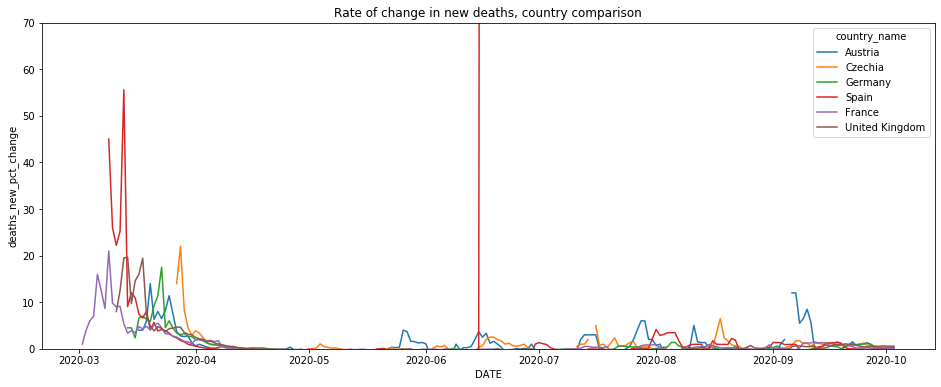

In [55]:
#@title Rates of change (week to week) in deaths
df = df.set_index(['ISO', 'DATE'])
df.loc[:, 'deaths_new_pct_change'] = df.loc[:, 'deaths_new_smoothed'].groupby(level=0).pct_change(periods=7)  
df = df.reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
plot_df = df[df.ISO.isin(isos)].query('DATE > "{}"'.format(start_date))
sns.lineplot(data=plot_df, x='DATE', y='deaths_new_pct_change', hue='country_name')
ax.set(ylim=(0,70))
plt.title('Rate of change in new deaths, country comparison');

In [56]:
# データの変形
plot_df = df.set_index(['ISO', 'DATE']).copy()
plot_df['deaths_week_window'] = plot_df['deaths_new'].copy()
plot_df.loc[:, 'deaths_week_window'] = plot_df.loc[:, 'deaths_week_window'].groupby(level=0).apply(lambda rows: rows.rolling(7).sum())
plot_df.loc[:, ['deaths_week_window']] = plot_df.loc[:, ['deaths_week_window']].groupby(level=0).shift(periods=-3)
plot_df

country_name  npi_school_closing  npi_workplace_closing  \
ISO DATE                                                                 
ABW 2020-01-01        Aruba                 0.0                    0.0   
    2020-01-02        Aruba                 0.0                    0.0   
    2020-01-03        Aruba                 0.0                    0.0   
    2020-01-04        Aruba                 0.0                    0.0   
    2020-01-05        Aruba                 0.0                    0.0   
...                     ...                 ...                    ...   
ZWE 2020-09-29     Zimbabwe                 NaN                    NaN   
    2020-09-30     Zimbabwe                 NaN                    NaN   
    2020-10-01     Zimbabwe                 NaN                    NaN   
    2020-10-02     Zimbabwe                 NaN                    NaN   
    2020-10-03     Zimbabwe                 NaN                    NaN   

                npi_cancel_public_events  npi_gatherings_restrictions  \
ISO DATE                                                                
ABW 2020-01-01                       0.0                          0.0   
    2020-01-02                       0.0                          0.0   
    2020-01-03                       0.0                          0.0   
    2020-01-04                       0.0                          0.0   
    2020-01-05                       0.0                          0.0   
...                                  ...                          ...   
ZWE 2020-09-29                       NaN                          NaN   
    2020-09-30                       NaN                          NaN   
    2020-10-01                       NaN                          NaN   
    2020-10-02                       NaN                          NaN   
    2020-10-03                       NaN                          NaN   

                npi_close_public_transport  npi_stay_at_home  \
ISO DATE                                                       
ABW 2020-01-01                         0.0               0.0   
    2020-01-02                         0.0               0.0   
    2020-01-03                         0.0               0.0   
    2020-01-04                         0.0               0.0   
    2020-01-05                         0.0               0.0   
...                                    ...               ...   
ZWE 2020-09-29                         NaN               NaN   
    2020-09-30                         NaN               NaN   
    2020-10-01                         NaN               NaN   
    2020-10-02                         NaN               NaN   
    2020-10-03                         NaN               NaN   

                npi_internal_movement_restrictions  \
ISO DATE                                             
ABW 2020-01-01                                 0.0   
    2020-01-02                                 0.0   
    2020-01-03                                 0.0   
    2020-01-04                                 0.0   
    2020-01-05                                 0.0   
...                                            ...   
ZWE 2020-09-29                                 NaN   
    2020-09-30                                 NaN   
    2020-10-01                                 NaN   
    2020-10-02                                 NaN   
    2020-10-03                                 NaN   

                npi_international_travel_controls  npi_income_support  \
ISO DATE                                                                
ABW 2020-01-01                                0.0                 0.0   
    2020-01-02                                0.0                 0.0   
    2020-01-03                                0.0                 0.0   
    2020-01-04                                0.0                 0.0   
    2020-01-05                                0.0                 0.0   
...                                           ...      

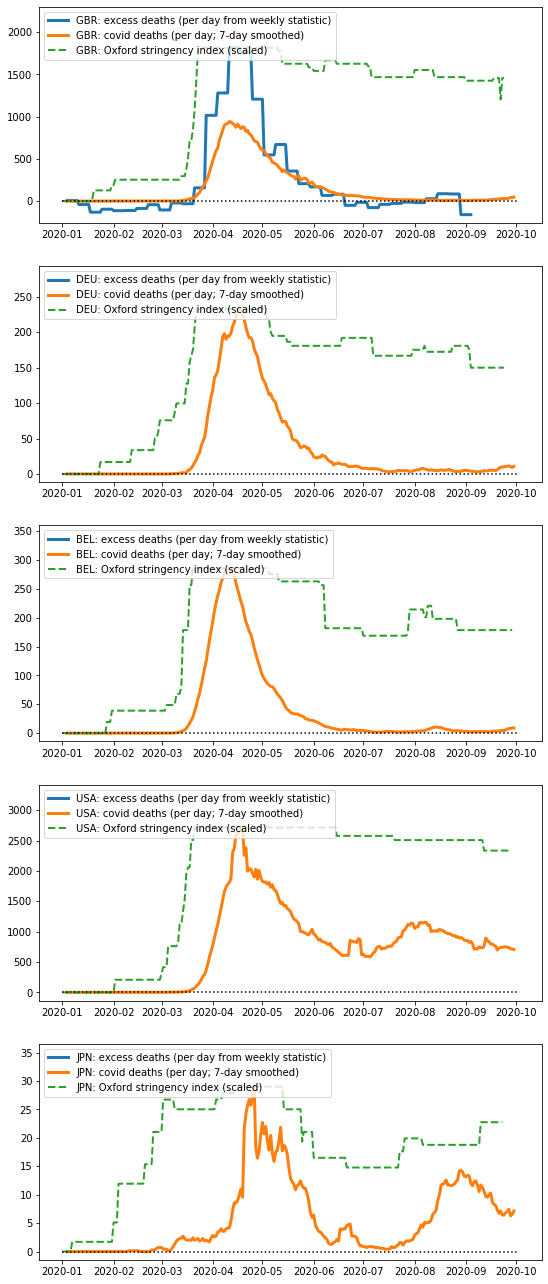

In [57]:
#@title Excess deaths
isos = ['GBR', 'DEU', 'BEL', 'USA', 'JPN']
fig, ax = plt.subplots(len(isos), 1, figsize=(9, 6 * len(isos)))

for idx in range(len(isos)):
  if len(isos) > 1:
    a = ax[idx]
  else:
    a = ax

  iso = isos[idx]
  ctry = plot_df.loc[iso]
  x = ctry.index # The second index is the date.
  
  y = ctry['deaths_excess_daily_avg']
  maximum = y.max()
  a.plot(x, y, '-', linewidth=3,
         label=iso + ': excess deaths (per day from weekly statistic)')
  
  y = ctry['deaths_week_window'] / 7
  maximum = maximum if maximum > y.max() else y.max()  
  a.plot(x, y, '-', linewidth=3,
         label=iso + ': covid deaths (per day; 7-day smoothed)')           
      
  y = ctry['npi_stringency_index']
  y = y / y.max() * maximum
  a.plot(x, y, '--', linewidth=2,
         label=iso + ': Oxford stringency index (scaled)')      
  
  a.plot(x, np.zeros(x.shape), ':k')
  bottom, top = a.get_ylim()
  a.set_ylim(bottom, 1.2 * top) # Space for the long legend.
  fig.subplots_adjust(bottom=0.3)
  a.legend(loc='upper left', fontsize=10)

## 症例死亡率(Case Fatality Rate; CFR)
症例死亡率とは、以下のように定義される。

$$\frac{\text{Number of deaths}}{\text{Number of cases}} \times 100$$

上位10カ国の症例数を経時的にプロットして確認する。

症例死亡率が時間の経過とともに変化し、また国によってその値が大きく異なっている。

つまり、（このデータを用いて計算した場合）国ごとの検査・報告方針の違いが症例死亡率に影響していることを示唆している。

In [58]:
#@title CFR Plot
countries = df.groupby('country_name').cases_total.max().nlargest(10)
countries.loc['Japan'] = 0
countries = countries.index
plot_df = df[df.country_name.isin(countries)].copy()
plot_df.loc[:, 'CFR'] = plot_df['deaths_total'] / plot_df['cases_total'] * 100
plot_df = plot_df.query('DATE > "2020-03-01"')
plot_df

,ISO,DATE,country_name,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean,deaths_new_smoothed,cases_new_smoothed,deaths_new_pct_change,CFR
2000,ARG,2020-03-02,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,5.0,0.001,0.000,3.0,0.000,45195777.0,16.177,31.9,18933.907,-2.0,-6.0,NaN,NaN,NaN,1.0,4.0,-8.0,7.0,16.0,-1.0,86.76,NaN,101.01,5.0,21.8,19280518.0,10102450.0,NaN,NaN,2.541167e-06,0.012105,254.478557,25.101566,20.606542,30.208933,3.523400,NaN,NaN,NaN,NaN
2001,ARG,2020-03-03,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,7.0,0.001,0.000,4.0,0.000,45195777.0,16.177,31.9,18933.907,-1.0,-5.0,NaN,NaN,NaN,0.0,5.0,-6.0,8.0,16.0,-1.0,88.90,NaN,104.39,5.0,21.8,19280518.0,10102450.0,NaN,NaN,4.485285e-07,0.012329,257.629236,24.644697,19.865945,29.985064,3.469020,NaN,NaN,NaN,NaN
2002,ARG,2020-03-04,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,11.11,0.0,1.0,1.0,0.0,0.0,0.022,0.022,0.000,0.000,37.0,6.0,0.001,0.000,4.0,0.000,45195777.0,16.177,31.9,18933.907,0.0,-4.0,NaN,NaN,NaN,-1.0,3.0,-1.0,8.0,18.0,-2.0,92.74,NaN,108.23,5.0,21.8,19280518.0,10102450.0,NaN,NaN,6.222303e-07,0.012571,253.435564,24.842298,20.118274,30.158332,3.089116,NaN,NaN,NaN,0.000000
2003,ARG,2020-03-05,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,11.11,0.0,1.0,0.0,0.0,0.0,0.022,0.000,0.000,0.000,44.0,7.0,0.001,0.000,5.0,0.000,45195777.0,16.177,31.9,18933.907,1.0,-3.0,NaN,NaN,NaN,1.0,4.0,-9.0,10.0,18.0,-1.0,97.45,NaN,113.92,5.0,21.8,19280518.0,10102450.0,NaN,NaN,2.324166e-06,0.012465,252.331999,24.446996,19.984524,29.443406,3.841515,NaN,NaN,NaN,0.000000
2004,ARG,2020-03-06,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,11.11,0.0,2.0,1.0,0.0,0.0,0.044,0.022,0.000,0.000,54.0,10.0,0.001,0.000,5.0,0.000,45195777.0,16.177,31.9,18933.907,2.0,-2.0,NaN,NaN,NaN,6.0,8.0,-7.0,12.0,18.0,-2.0,118.32,NaN,126.70,5.0,21.8,19280518.0,10102450.0,NaN,NaN,3.484900e-06,0.012619,225.186027,24.133286,19.863302,29.106444,3.477206,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50686,ZAF,2020-09-29,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,671669.0,903.0,16586.0,188.0,11324.968,15.225,279.655,3.170,4164491.0,12011.0,70.217,0.203,14339.0,0.242,593

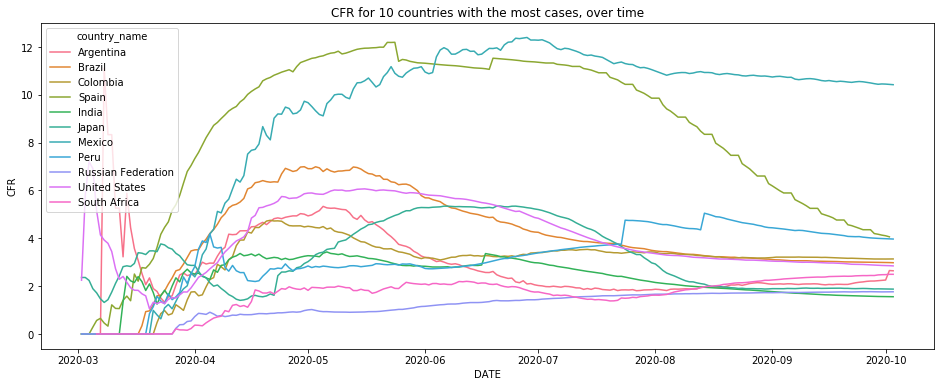

In [59]:
# 描画
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=plot_df, x='DATE', y='CFR', hue='country_name')
plt.title('CFR for 10 countries with the most cases, over time')
plt.show()

## COVID-19 検査

このデータセットにはCOVID-19検査の実施数が含まれている。

このデータはすべての国で使用されているわけではなく、また使用されている場合でも、確認された症例数と同じ頻度で報告されていない可能性があるので、使用する際には注意が必要である。

そのことをグラフで確認する。

このプロットすると、多くの国が初めて症例報告を開始し、日が経つにつれて減少しているのが分かる。

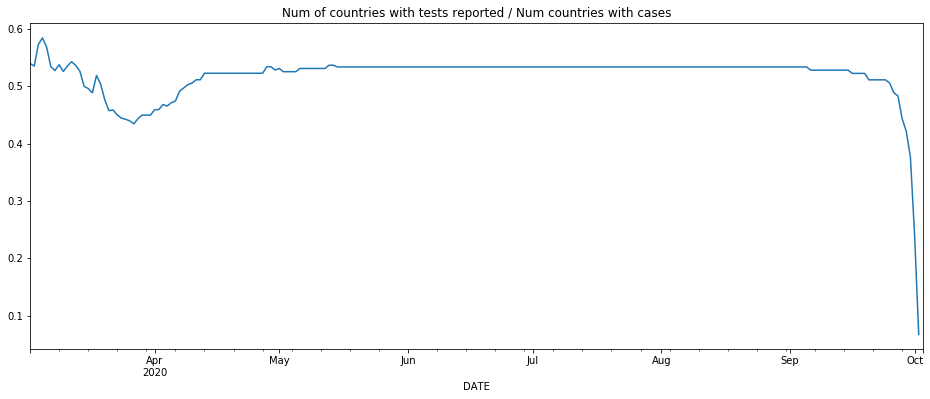

In [60]:
#@title Countries with number of tests data as a proportion of those that have confirmed cases
fig, ax = plt.subplots(figsize=(16, 6))
countries = df.query(f'DATE > "{start_date}" and cases_total > 0').groupby('DATE')['country_name'].count()
tests = df.query(f'DATE > "{start_date}" and tests_total > 0').groupby('DATE')['country_name'].count()
(tests / countries).plot()
plt.title('Num of countries with tests reported / Num countries with cases')
plt.show()

新しい検査の数には、日々大きな変動が見られる。

また、ドイツやスペインなどの一部の国では、検査の累積合計しか報告していないため、tests_newにはデータが存在しない。

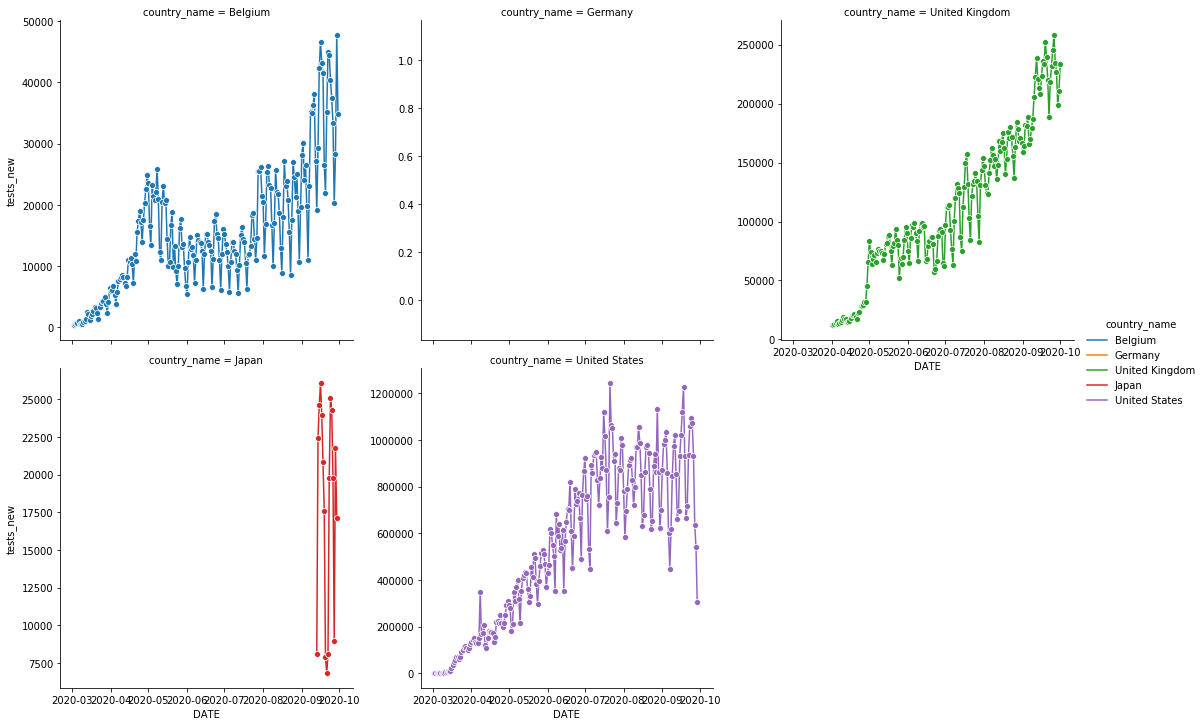

In [61]:
#@title Number of Tests - Artifacts
plot_df = df[(df.ISO.isin(isos)) & (df.DATE > start_date)].set_index(['ISO', 'DATE'])

sns.relplot(data=plot_df.reset_index(), x='DATE', y='tests_new', kind='line', col='country_name', col_wrap=3, marker='o', facet_kws=dict(sharey=False), hue='country_name')
plt.show()

Our World in Data ではは、7日間で平均化された新しい検査数のデータも提供している。

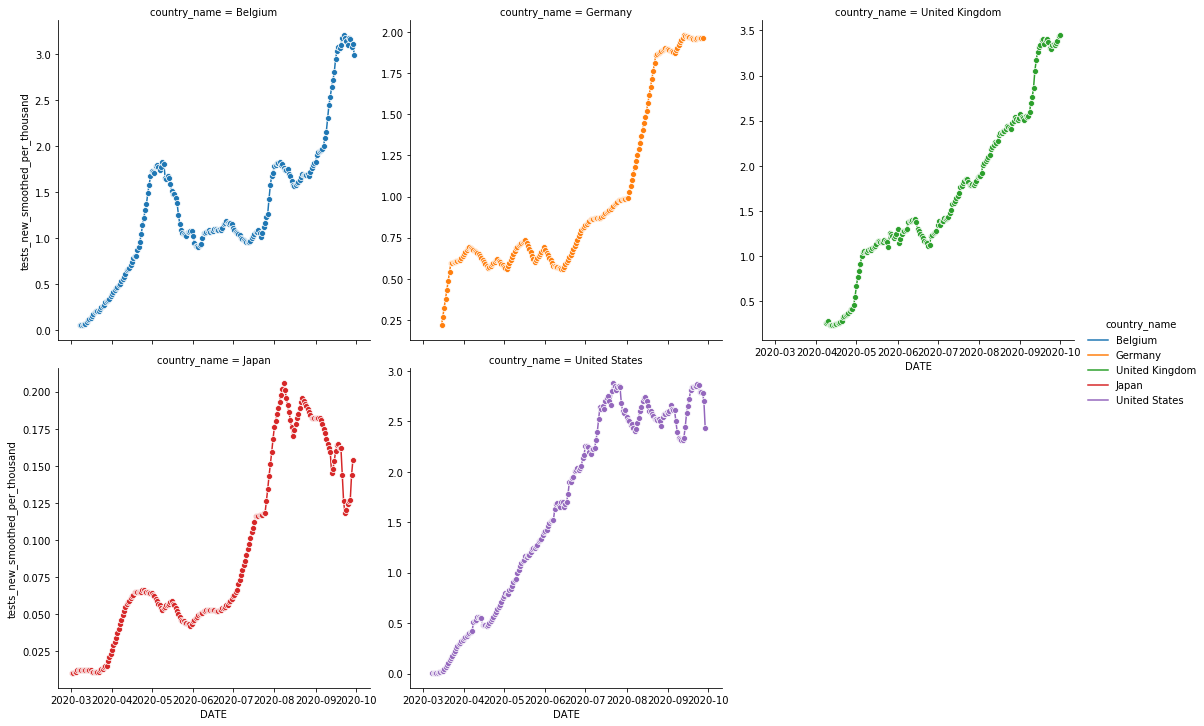

In [62]:
#@title Smoothed Tests
plot_df = df[(df.ISO.isin(isos)) & (df.DATE > start_date)].set_index(['ISO', 'DATE'])
sns.relplot(data=plot_df.reset_index(), x='DATE', y='tests_new_smoothed_per_thousand', kind='line', col='country_name', col_wrap=3, marker='o', facet_kws=dict(sharey=False), hue='country_name')
plt.show()

# Mobility

下の図は、ある国のモビリティ（人々の移動）の傾向をプロットしたもの。

多くの国で、住宅地での移動が増加している一方で、職場、小売店、レクリエーション、乗り換え駅での移動が大幅に減少していることがわかる。

イギリスでは、天候が良くなったためか、公園への移動が大幅に増加している。

曜日に対してプロットすると、曜日効果があることが明確になる。

Dropdown(description='Country:', index=174, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), (…

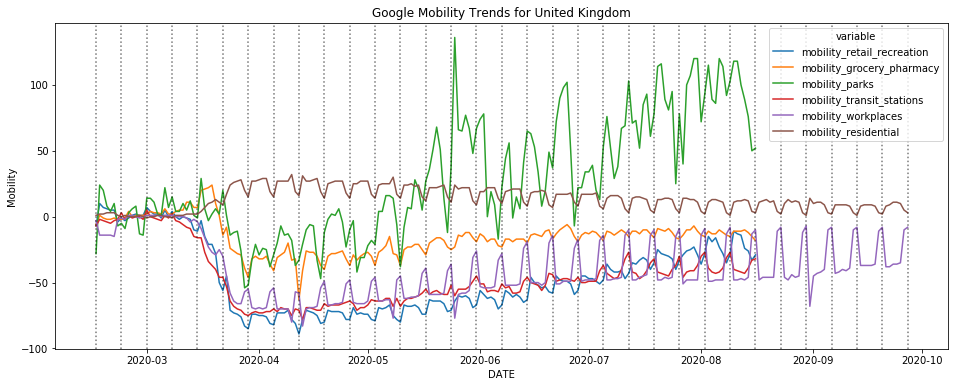

In [63]:
#@title Google Mobilty Trends
google_mobility_columns = [
    'mobility_retail_recreation',
    'mobility_grocery_pharmacy', 
    'mobility_parks',
    'mobility_transit_stations', 
    'mobility_workplaces',
    'mobility_residential'
]

def add_widget(country):
  country_widget = widgets.Dropdown(
      options=sorted([(c, c) for c in df.country_name.unique()]),
      value=country,
      description='Country:',
  )

  country_widget.observe(lambda d: plot_country(d['new']), 'value')
  display(country_widget)

def plot_country(country):
  clear_output()
  add_widget(country)
  plot_df = df[(df.country_name == country) & (df.DATE > '2020-02-15')][['ISO', 'DATE', 'country_name'] + google_mobility_columns]
  plot_df = plot_df.melt(id_vars=['ISO', 'DATE', 'country_name'], value_name='Mobility')

  fig, ax = plt.subplots(figsize=(16, 6))
  sns.lineplot(data=plot_df, x='DATE', y='Mobility', hue='variable')
  plt.title('Google Mobility Trends for {}'.format(plot_df.country_name[0]))

  sundays = plot_df.DATE[plot_df.DATE.dt.dayofweek == 6]
  for sunday in sundays:
    plt.axvline(sunday, c='k', ls=':', alpha=0.1)

plot_country('United Kingdom')

Dropdown(description='Country:', index=86, options=(('Afghanistan', 'Afghanistan'), ('Albania', 'Albania'), ('…

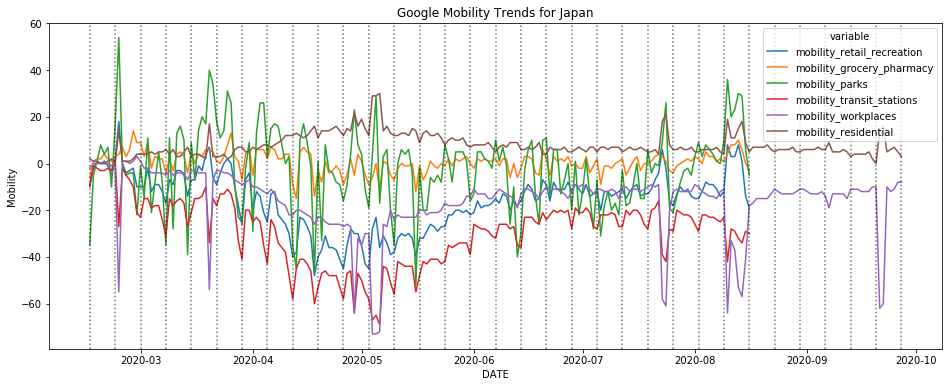

In [64]:
plot_country('Japan')

# Weather

データセットには、降水量、湿度、短波長放射（太陽光の代理）、気温が含まれている。

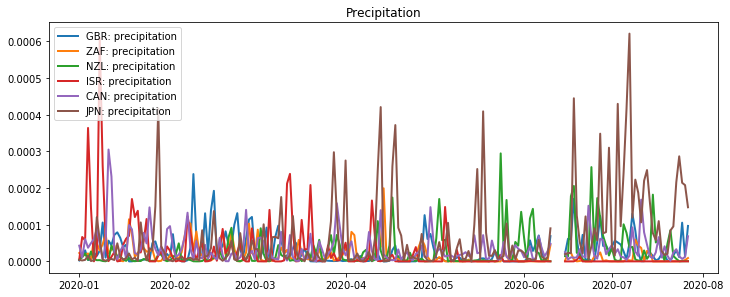

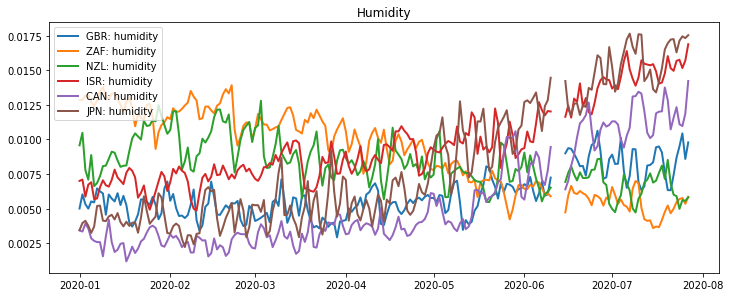

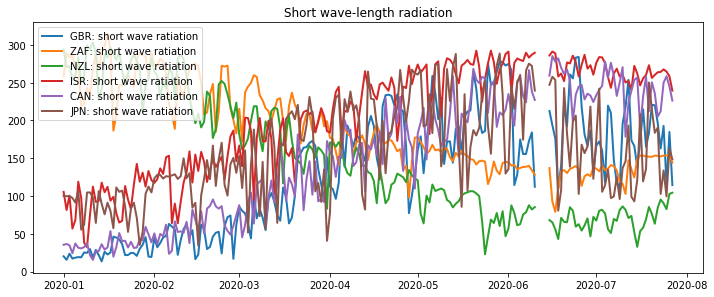

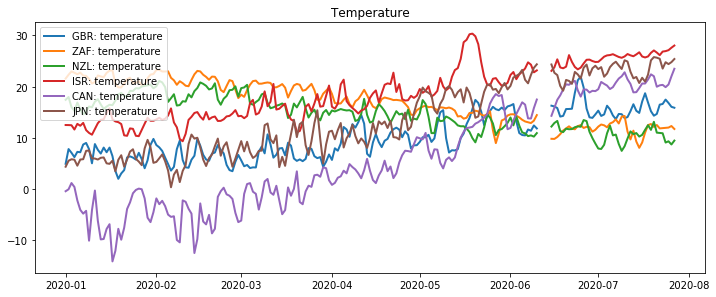

In [65]:
#@title Weather

isos = ['GBR', 'ZAF', 'NZL', 'ISR', 'CAN', 'JPN']

plot_df = df.set_index(['ISO', 'DATE'])

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for idx in range(len(isos)):
  iso = isos[idx]
  ctry = plot_df.loc[iso]
  x = ctry.index  
  y = ctry['weather_precipitation_mean']  
  ax.plot(x, y, '-', linewidth=2,
          label=iso + ': precipitation')
fig.subplots_adjust(bottom=0.3)
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Precipitation')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for idx in range(len(isos)):
  iso = isos[idx]
  ctry = plot_df.loc[iso]
  x = ctry.index  
  y = ctry['weather_humidity_mean']
  ax.plot(x, y, '-', linewidth=2,
          label=iso + ': humidity')
fig.subplots_adjust(bottom=0.3)
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Humidity')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for idx in range(len(isos)):
  iso = isos[idx]
  ctry = plot_df.loc[iso]
  x = ctry.index  
  y = ctry['weather_sw_radiation_mean']
  ax.plot(x, y, '-', linewidth=2,
          label=iso + ': short wave ratiation')
fig.subplots_adjust(bottom=0.3)
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Short wave-length radiation')

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for idx in range(len(isos)):
  iso = isos[idx]
  ctry = plot_df.loc[iso]
  x = ctry.index  
  y = ctry['weather_temperature_mean']
  ax.plot(x, y, '-', linewidth=2,
          label=iso + ': temperature')
fig.subplots_adjust(bottom=0.3)
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Temperature');
